###  Importing libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = './HousingData.csv'
data = pd.read_csv(file_path)


### Preprocessing Data

In [2]:
# Removing data with missing values
data = data.dropna()

### Defining the response variable

In [3]:
median_crime = data['CRIM'].median()
data['HighCrime'] = (data['CRIM'] > median_crime).astype(int)

### Defining predictor variables and splitting into training and test data

In [4]:
X = data.drop(columns=['CRIM', 'HighCrime'])
y = data['HighCrime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standardizing the data

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print("-"*50)
print(classification_report(y_test, y_pred_log_reg))
print("-"*50)
print(confusion_matrix(y_test, y_pred_log_reg))
print("-"*50)

Logistic Regression Accuracy: 0.8655
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        62
           1       0.87      0.84      0.86        57

    accuracy                           0.87       119
   macro avg       0.87      0.86      0.87       119
weighted avg       0.87      0.87      0.87       119

--------------------------------------------------
[[55  7]
 [ 9 48]]
--------------------------------------------------


### Findings
1. Logistic Regression achieves a strong accuracy of 86.55%, showing that it performs well in predicting both high and low crime areas.
2. Recall for Class 0 (Low Crime) is 89%, while for Class 1 (High Crime) it is 84%. This suggests that the model is slightly better at detecting low-crime areas than high-crime areas.
3. The model is slightly more prone to missing high-crime areas (false negatives) than wrongly flagging low-crime areas.

# Linear Discriminant Analysis (LDA)

In [7]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"LDA Accuracy: {accuracy_lda:.4f}")
print("-"*50)
print(classification_report(y_test, y_pred_lda))
print("-"*50)
print(confusion_matrix(y_test, y_pred_lda))
print("-"*50)

LDA Accuracy: 0.8403
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        62
           1       0.90      0.75      0.82        57

    accuracy                           0.84       119
   macro avg       0.85      0.84      0.84       119
weighted avg       0.85      0.84      0.84       119

--------------------------------------------------
[[57  5]
 [14 43]]
--------------------------------------------------


### Findings
1. LDA achieves an 84.03% accuracy, which is slightly worse than logistic regression
2. The recall for Class 0 (92%) is significantly higher than for Class 1 (75%), meaning that LDA is much better at detecting low-crime areas but struggles to correctly classify high-crime areas.
3. 14 false negatives suggests that LDA underestimates high-crime areas more than any other model.

# Naive Bayes

In [8]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("-"*50)
print(classification_report(y_test, y_pred_nb))
print("-"*50)
print(confusion_matrix(y_test, y_pred_nb))
print("-"*50)

Naive Bayes Accuracy: 0.8067
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        62
           1       0.83      0.75      0.79        57

    accuracy                           0.81       119
   macro avg       0.81      0.80      0.81       119
weighted avg       0.81      0.81      0.81       119

--------------------------------------------------
[[53  9]
 [14 43]]
--------------------------------------------------


### Findings
1. This is the weakest-performing model in terms of accuracy.
2. With 14 false negatives, Naïve Bayes tends to under-detect high-crime areas, and its 9 false positives indicate occasional misclassification of low-crime areas.

# k-Nearest Neighbors (KNN)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN (k=5) Accuracy: {accuracy_knn:.4f}")
print("-"*50)
print(classification_report(y_test, y_pred_knn))
print("-"*50)
print(confusion_matrix(y_test, y_pred_knn))
print("-"*50)

KNN (k=5) Accuracy: 0.9328
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.93      0.93      0.93        57

    accuracy                           0.93       119
   macro avg       0.93      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119

--------------------------------------------------
[[58  4]
 [ 4 53]]
--------------------------------------------------


### Findings
1. KNN outperforms all other models in classification accuracy.
2. Precision and recall for both Class 0 and Class 1 are nearly equal (93-94%), meaning KNN does not show bias towards either class.
3. The confusion matrix has the lowest misclassification rates, with only 4 false positives and 4 false negatives.

## Comparing Models

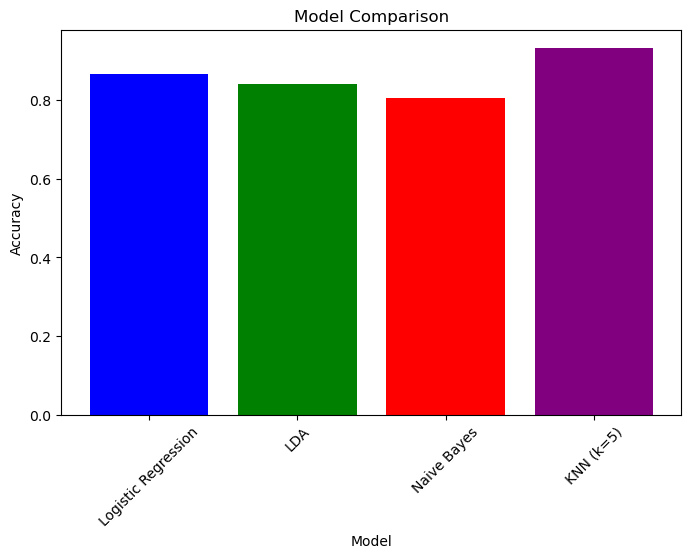

In [10]:
results = {
    'Logistic Regression': accuracy_log_reg,
    'LDA': accuracy_lda,
    'Naive Bayes': accuracy_nb,
    'KNN (k=5)': accuracy_knn
}

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()

## Conclusion
1. KNN is the best model overall, achieving the highest accuracy (93.28%) and lowest misclassification errors.
2. Logistic Regression is the second-best model with good balance, but slightly lower recall for high-crime areas.
3. LDA and Naïve Bayes tend to under-predict high-crime areas (higher false negatives), making them less reliable for crime rate classification.
4. LDA has the highest precision for Class 1 (high crime), but at the cost of high false negatives (missing high-crime areas).
5. Naïve Bayes shows the weakest performance, likely due to its assumption of feature independence, which doesn't hold well in this dataset.

Thus, we can say that KNN is the most reliable model for this classification task, Logistic Regression provides a balanced trade-off, and LDA and Naïve Bayes are less suitable due to their higher misclassification of high-crime areas.